<a href="https://colab.research.google.com/github/yisiszhang/AdvancedPython/blob/main/Precept2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# let's explore the digit data
# each data (0-9) is a 8x8=64 dimension image
digit = datasets.load_digits()
X = digit.data
y = digit.target

print(X.shape)
print(y[:10])

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


# PCA

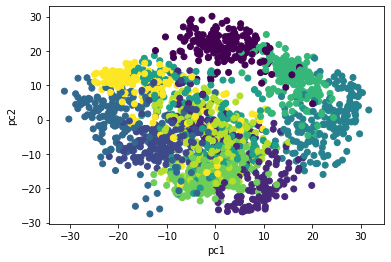

In [4]:
# explore the data
# PCA
from sklearn.decomposition import PCA

pca = PCA()
#pca.fit(X)

# plot the first 2 PCs in the PC space
pc = pca.fit_transform(X)

plt.scatter(pc[:,0],pc[:,1],c=y)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

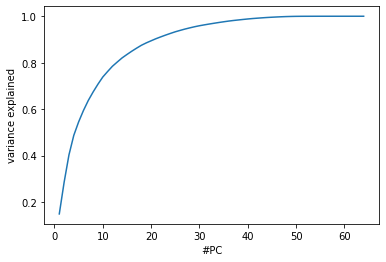

29


In [ ]:
# how many PCs are enough to describe the data (we usually use >95% cumulative explained variance)?

var_explained = pca.explained_variance_ratio_
# calculate cumulative variance explained
cumsum = np.cumsum(var_explained)

# plot cumulative explained variance vs # PC
plt.plot(np.arange(1,len(cumsum)+1), cumsum)
plt.xlabel('#PC')
plt.ylabel('variance explained')
plt.show()

# print # PCs to include
d = np.argmax(cumsum >= 0.95) + 1
print(d)

# K-means

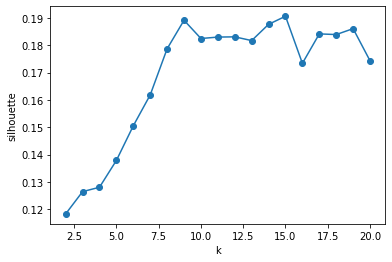

15


In [5]:
# cluster data using k-means
# determine k to use using silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil = []
kmax = 20
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters=k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric='euclidean'))

# plot silouette vs k
plt.plot(np.arange(2,kmax+1), sil, 'o-')
plt.xlabel('k')
plt.ylabel('silhouette')

plt.show()

# determine k
best_k = sil.index(max(sil)) + 2
print(best_k)

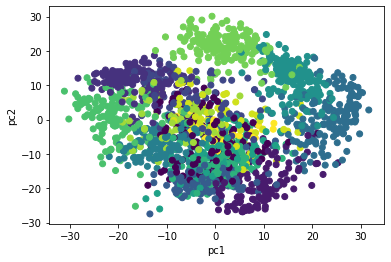

In [6]:
# visualize kmeans result using the best k in first 2 PCs
kmeans = KMeans(n_clusters=best_k).fit(X)

plt.scatter(pc[:,0], pc[:,1], c=kmeans.labels_)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

# Classification

In [7]:
# split data into training and test sets
from sklearn.model_selection import train_test_split
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)

print(X_train.shape)
print(X_test.shape)

(1437, 64)
(360, 64)


In [9]:
# compare logistic regression vs LDA performance in predicting labels
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# train a logistic regression model
lr_clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)
# train a LDA model
lda_clf = LinearDiscriminantAnalysis().fit(X_train, y_train)

# print accuracy
y_pred_lr = lr_clf.predict(X_test)
y_pred_lda = lda_clf.predict(X_test)
print('Logistic regression accuracy: %f' % accuracy_score(y_test, y_pred_lr))
print('LDA accuracy: %f' % accuracy_score(y_test, y_pred_lda))

Logistic regression accuracy: 0.961111
LDA accuracy: 0.958333


In [10]:
# train a linear SVC and use cross-validation to determine C
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

nfolds = 5
skf = StratifiedKFold(n_splits=nfolds)

Cs = np.logspace(-5, 1, 20)
scores = np.zeros(len(Cs))
clf = LinearSVC(random_state=0)
i = 0
for C in Cs:
  score = []
  clf.set_params(C=C)
  for train, test in skf.split(X_train, y_train):
    clf.fit(X_train[train], y_train[train])
    y_pred = clf.predict(X_train[test])
    score.append(accuracy_score(y_train[test], y_pred))
  scores[i] = (np.array(score)).mean()
  i += 1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
# cross_val_score funtion is very handy. You should understand this is doing the same thing as above
from sklearn.model_selection import cross_val_score

Cs = np.logspace(-5, 1, 20)
scores = np.zeros(len(Cs))
clf = LinearSVC(random_state=0)
i = 0
for C in Cs:
  clf.set_params(C=C)
  score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
  scores[i] = score.mean()
  i += 1

# print the best C
best_C = Cs[np.argmax(scores)]
print(best_C)  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.0007847599703514606


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
# report the final test accuracy
# print the best C
best_C = Cs[np.argmax(scores)]
print(best_C)  

# report the test accuracy score using the selected C
clf.set_params(C=best_C).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Linear SVC accuracy: %f' % accuracy_score(y_test, y_pred))

0.003359818286283781
Linear SVC accuracy: 0.966667
